In [ ]:
# Lab 7 Learning rate and Evaluation
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# parameters
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 183844557.25it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 54887038.43it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49243754.69it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17334421.08it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



<function matplotlib.pyplot.show(close=None, block=None)>

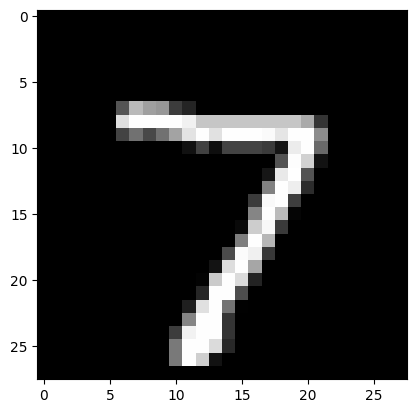

In [ ]:
img, label = mnist_test[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.show

In [134]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size = batch_size, shuffle=True, drop_last=True)

In [ ]:
linear = nn.Linear(784, 10, bias=True).to(device)
optimizer = optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader) # 600개

    for x, y in data_loader:
        # reshape input image into [batch_size by 784]
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)
        hypothesis = linear(x)
        cost = F.cross_entropy(hypothesis, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch
    print('Epoch: {:4d}, Cost: {:.6f}'.format(epoch, avg_cost))
print('Learning finished')

Epoch:    0, Cost: 0.535151
Epoch:    1, Cost: 0.359578
Epoch:    2, Cost: 0.331264
Epoch:    3, Cost: 0.316405
Epoch:    4, Cost: 0.307107
Epoch:    5, Cost: 0.300457
Epoch:    6, Cost: 0.294933
Epoch:    7, Cost: 0.290956
Epoch:    8, Cost: 0.287074
Epoch:    9, Cost: 0.284516
Epoch:   10, Cost: 0.281914
Epoch:   11, Cost: 0.279527
Epoch:   12, Cost: 0.277637
Epoch:   13, Cost: 0.275875
Epoch:   14, Cost: 0.274423
Learning finished


In [128]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean() # torch.mean() 은 float 아니면 불가능
    print('Accuracy: {:.4f}%'.format(accuracy* 100))

Accuracy: 88.8300%


In [ ]:
# 정확도 구하는 방법 2
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = linear(x_test)
    prediction_class = prediction.max(1)[1]
    correct_prediction = (prediction_class == y_test).float().mean()
    print('Accuracy: {:.6f}'.format(correct_prediction * 100))

Accuracy: 88.830002


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


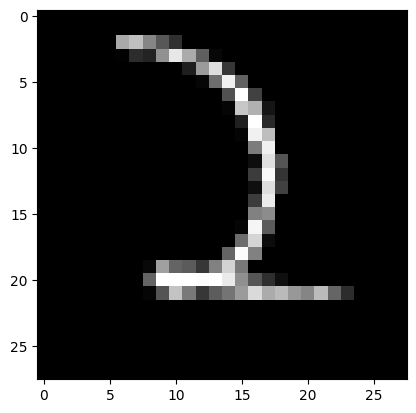

정답: 2
예측: 2


In [ ]:
# test set 안의 랜덤 이미와 label, 그리고 예측값 출력
n = random.randint(0, len(mnist_test)-1)

x_single_data = mnist_test.test_data[n].view(-1, 28*28).float().to(device)
y_single_data = mnist_test.test_labels[n].to(device)

prediction = linear(x_single_data)
single_prediction = torch.argmax(prediction, 1)

plt.imshow(mnist_test.test_data[n].squeeze(), cmap='gray')
plt.show()

print("정답:", y_single_data.item())
print("예측:", single_prediction.item())